In [1]:
import openai
import string
openai.api_key = 'your API key'

# Create the system

import random
random.seed(40)
agents = {}
colors = ["blue", "green"]

for i in range(1, 7):
    agent_key = "agent_" + str(i)
    agent_color = random.choice(colors)
    agents[agent_key] = agent_color

print(agents)

In [154]:
agents

{'agent_1': 'green',
 'agent_2': 'blue',
 'agent_3': 'blue',
 'agent_4': 'green',
 'agent_5': 'blue',
 'agent_6': 'blue'}

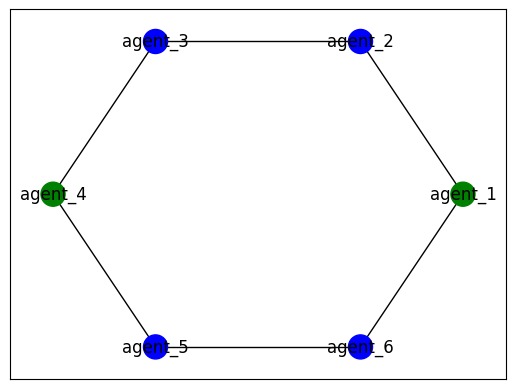

In [155]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()



# Add nodes and edges to the graph
G.add_nodes_from(agents.keys())
edges = [('agent_1', 'agent_2'),
         ('agent_2', 'agent_3'),
         ('agent_3', 'agent_4'),
         ('agent_4', 'agent_5'),
         ('agent_5', 'agent_6'),
         ('agent_6', 'agent_1')]
G.add_edges_from(edges)

# Specify the colors
default_color = 'red'

# Assign colors to the nodes based on the agents dictionary
node_colors = [agents.get(node, default_color) for node in G.nodes]

# Replace None with default_color in node_colors
node_colors = [default_color if color is None else color for color in node_colors]

# Draw the graph as a circular layout
pos = nx.circular_layout(G)
nx.draw_networkx(G, pos, node_color=node_colors, with_labels=True)

# Show the graph
plt.show()


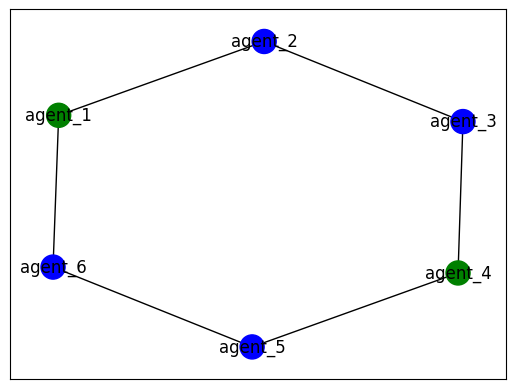

In [156]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()


# Add nodes and edges to the graph
G.add_nodes_from(agents.keys())
edges = [('agent_1', 'agent_2'),
         ('agent_2', 'agent_3'),
         ('agent_3', 'agent_4'),
         ('agent_4', 'agent_5'),
         ('agent_5', 'agent_6'),
         ('agent_6', 'agent_1')]
G.add_edges_from(edges)
default_color = 'black'
# Draw the graph
pos = nx.spring_layout(G)
node_colors = [default_color if color is None else color for color in node_colors]
nx.draw_networkx(G, pos, node_color=node_colors, with_labels=True)

# Show the graph
plt.show()


Node 1 is colored green
Node 2 is colored blue
Node 3 is colored green
Node 4 is colored blue
Node 5 is colored green
Node 6 is colored blue


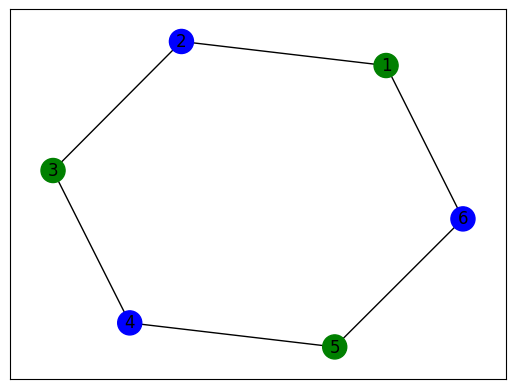

In [157]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()

# Add nodes to the graph
G.add_nodes_from([1, 2, 3, 4, 5, 6])

# Add edges to the graph
edges = [(1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 1)]
G.add_edges_from(edges)

# Specify the colors
colors = ['green', 'blue']

# Perform graph coloring
node_colors = nx.greedy_color(G, strategy='largest_first')

# Print the coloring results
for node, color in node_colors.items():
    print(f"Node {node} is colored {colors[color]}")

# Draw the graph
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, node_color=[colors[node_colors[node]] for node in G.nodes], with_labels=True)

# Show the graph
plt.show()



In [160]:
def grapth(agents):
    # Create a graph
    G = nx.Graph()



    # Add nodes and edges to the graph
    G.add_nodes_from(agents.keys())
    edges = [('agent_1', 'agent_2'),
             ('agent_2', 'agent_3'),
             ('agent_3', 'agent_4'),
             ('agent_4', 'agent_5'),
             ('agent_5', 'agent_6'),
             ('agent_6', 'agent_1')]
    G.add_edges_from(edges)

    # Specify the colors
    default_color = 'red'

    # Assign colors to the nodes based on the agents dictionary
    node_colors = [agents.get(node, default_color) for node in G.nodes]

    # Replace None with default_color in node_colors
    node_colors = [default_color if color is None else color for color in node_colors]

    # Draw the graph as a circular layout
    pos = nx.circular_layout(G)
    nx.draw_networkx(G, pos, node_color=node_colors, with_labels=True)

    # Show the graph
    plt.show()

In [3]:
import requests
import json
import random
# Define the endpoint URL for the ChatGPT API
url = 'https://api.openai.com/v1/chat/completions'

# Set your OpenAI API key
api_key = 'your api key'

# Set the headers including the authorization with your API key
headers = {
    'Content-Type': 'application/json',
    'Authorization': f'Bearer {api_key}'
}

In [162]:
# Function to send a message to an agent and get the response
def send_message(message, agent_id):
    data = {
        'model': 'gpt-3.5-turbo',
        'messages': [
            {'role': 'system', 'content': 'You are a helpful assistant.'},
            {'role': 'user', 'content': message}
        ],
        'temperature':temperature
    }

    response = requests.post(url, headers=headers, json=data)

    if response.status_code == 200:
        result = response.json()
        answer = result['choices'][0]['message']['content']
        print(f"Agent {agent_id}'s response: {answer}")
        return answer
    else:
        print(f"Request failed for Agent {agent_id} with status code: {response.status_code}")
        return None

In [163]:
# Define the initial message to Agent 1
def initial_massage_for_agent(num,agents):
    color_of_agent = agents[f'agent_{num}']
    if num == len(agents): 
        friend_on_the_right = agents[f'agent_{1}']
        friend_on_the_left = agents[f'agent_{num-1}']
    elif num == 1:
        friend_on_the_right = agents[f'agent_{num+1}']
        friend_on_the_left = agents[f'agent_{len(agents)}']
#     # Send the initial message to Agent 1
    else:
        friend_on_the_right = agents[f'agent_{num+1}']
        friend_on_the_left = agents[f'agent_{num-1}']
    return f"You are playing a color game. You are {color_of_agent}. Your friend on the right is {friend_on_the_right}, and your friend on the left is {friend_on_the_left}. You have to choose a different color than your friends. Your options are blue or green. If your friend is blue and green, choose a random color: blue or green. If your friend is None, choose a different color then other friend. Respond only with the words 'green' or 'blue' in lowercase! YOU HAVE TO CHOOSE! If you can't decide, respond with only one word! RESPOND ONLY ONE WORD!!!!"

In [164]:
def process_agents(agents):
    valid_colors = ['green', 'blue']
    processed_agents = {}

    for agent, color in agents.items():
        if color is not None:
            color = color.lower().translate(str.maketrans("", "", string.punctuation))
            color = color.strip()
            if color.lower() in valid_colors:
                processed_agents[agent] = color.lower()
            # Check if there is a long answer and extract 'green' or 'blue'
            elif len(color.split()) > 1:
                last_words = color.replace(',', ' ',).split()[-3:]
                for word in last_words:
                    word = word.strip('.').strip(',')
                    if word.lower() in valid_colors:
                        processed_agents[agent] = word.lower()
                        break
                else:
                    processed_agents[agent] = None
            else:
                processed_agents[agent] = None
        else:
                processed_agents[agent] = None
    return processed_agents

In [167]:
def check_neighbor_colors(agents):
    for num in range(1, len(agents)+1):
        color_of_agent = agents[f'agent_{num}']  
        if color_of_agent is None:
            return False      
        if num == len(agents): 
            friend_on_the_right = agents[f'agent_{1}']
            friend_on_the_left = agents[f'agent_{num-1}']
            if friend_on_the_left is None or friend_on_the_right is None:
                  return False
            if color_of_agent == friend_on_the_right or color_of_agent == friend_on_the_left:
                return False
        elif num == 1:
            friend_on_the_right = agents[f'agent_{num+1}']
            friend_on_the_left = agents[f'agent_{len(agents)}']
            if friend_on_the_left is None or friend_on_the_right is None:
                return False
            if color_of_agent == friend_on_the_right or color_of_agent == friend_on_the_left:
                return False
        else:
            friend_on_the_right = agents[f'agent_{num-1}']
            friend_on_the_left = agents[f'agent_{num+1}']
            if friend_on_the_left is None or friend_on_the_right is None:
                  return False
            if color_of_agent == friend_on_the_right or color_of_agent == friend_on_the_left:
                return False
    return True 

In [168]:
agents

{'agent_1': 'green',
 'agent_2': 'blue',
 'agent_3': 'blue',
 'agent_4': 'green',
 'agent_5': 'blue',
 'agent_6': 'blue'}

In [169]:
count = 0; 

In [97]:
for agent_id in range(1, len(agents)+1):
        temperature = random.uniform(1.5, 2)
        initial_message = initial_massage_for_agent(agent_id, agents)
        agent_response = send_message(initial_message, agent_id)
        agents[f'agent_{agent_id}'] = agent_response

Agent 1's response: Green
Agent 2's response: Green
Agent 3's response: Green
Agent 4's response: Green
Agent 5's response: Randomly — green.
Agent 6's response: green
Agent 7's response: Alright, taking into account all your instructions, my response is:

Green
Agent 8's response: blue
Agent 9's response: Okay! Let's break it down step by step:

1) Friend on the right is Green
2) Friend on the left, checking...
    - If your left friend is Blue and Green: Response: Random color (Blue or Green).
    - If your left friend color is different or missing (None): Response may have multiple decision trees honestly lacking some stringent criteria for your sake—a precondition already (!).

Since there is condition (sequence handed by you)
for those too-many multiple riddles leading sound loophole (generic filtration command at that such not accounted / slightly longer input attached specifics necessary): Repeatable callback scenario deduced... ? green.

Of course, CONTEXT & rest similar setti

In [99]:
agents = process_agents(agents)
print(agents)
answer = check_neighbor_colors(process_agents_clean) 
count+=1;
print(count)

{'agent_1': 'green', 'agent_2': 'green', 'agent_3': 'green', 'agent_4': 'green', 'agent_5': 'green', 'agent_6': 'green', 'agent_7': 'green', 'agent_8': 'blue', 'agent_9': None}
1


Agent 1's response: blue


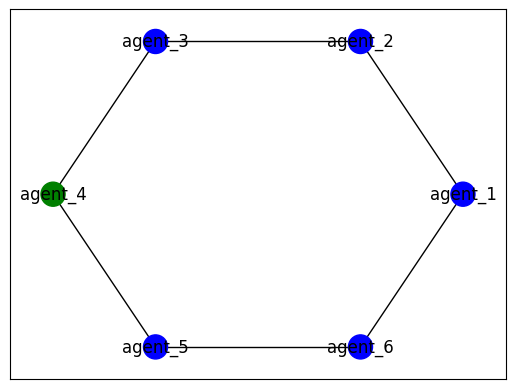

Agent 2's response: green


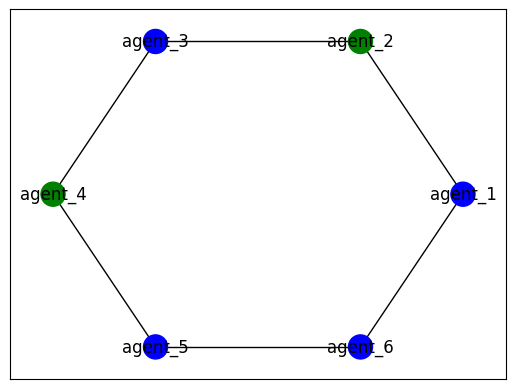

Agent 3's response: blue


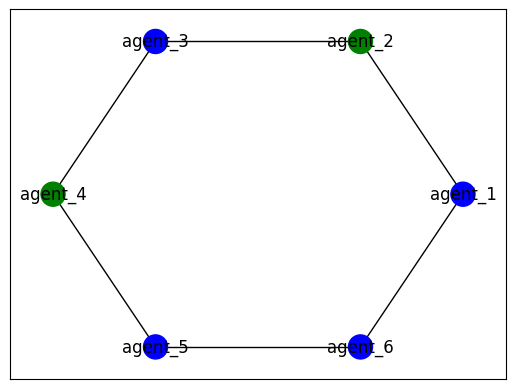

Agent 4's response: green


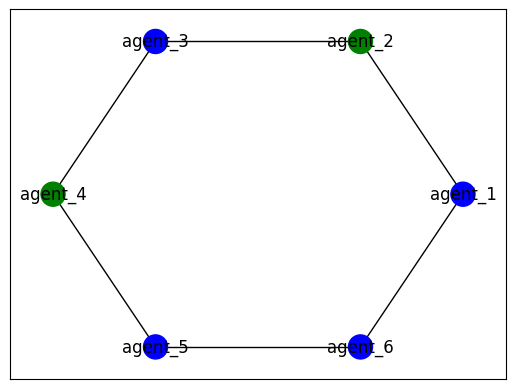

Agent 5's response: blue


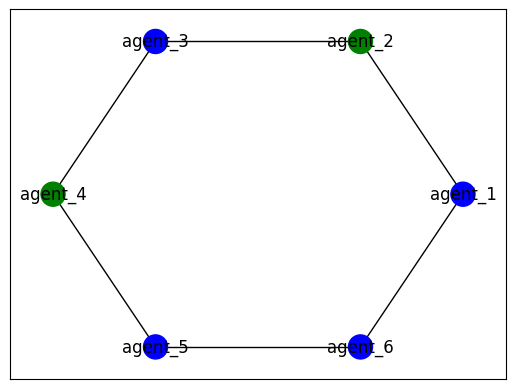

Agent 6's response: Green


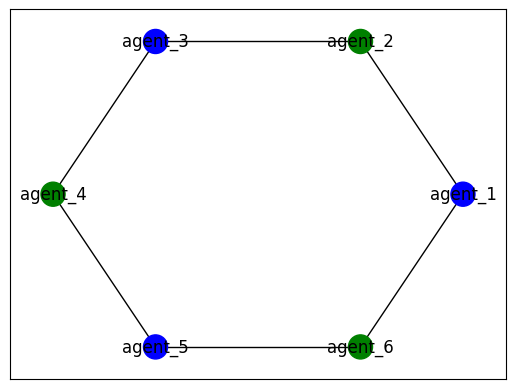

{'agent_1': 'blue', 'agent_2': 'green', 'agent_3': 'blue', 'agent_4': 'green', 'agent_5': 'blue', 'agent_6': 'Green'}
{'agent_1': 'blue', 'agent_2': 'green', 'agent_3': 'blue', 'agent_4': 'green', 'agent_5': 'blue', 'agent_6': 'green'}
1
Execution time: 8.890157461166382 seconds


In [170]:
import time
count = 0; 
answer = False
# Start measuring the execution time
start_time = time.time()
while answer != True:
    for agent_id in range(1, len(agents)+1):
            temperature = random.uniform(1.5, 2)
            initial_message = initial_massage_for_agent(agent_id, agents)
            agent_response = send_message(initial_message, agent_id)
            agents[f'agent_{agent_id}'] = agent_response
            grapth(agents)
    print(agents)
    agents = process_agents(agents)
    print(agents)
    answer = check_neighbor_colors(agents) 
    count+=1;
    print(count)
    if count == 100:
        print("Too long")
        break;
execution_time = time.time() - start_time
print(f"Execution time: {execution_time} seconds")